In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import sympy
from sympy import *
import matplotlib.pyplot as plt
from numpy.linalg import matrix_rank

### Collecting whole year data for a single Pixel Point

In [2]:
import Preparing_Dataset_for_BatchProcessing
import imp
imp.reload(Preparing_Dataset_for_BatchProcessing)
import Preparing_Dataset_for_BatchProcessing as r5

In [3]:
lat = 23.62
lon = 78.22
DF_batch = r5.Data_Batch_2020(lat,lon)
DF_batch = DF_batch[DF_batch['LAI']<1]
DF_batch

,SR_eff,SP_I,sp_lat,sp_lon,LAI,Day_No
0,6.038855,23.059137,23.690813,78.065280,0.881,1.0
1,4.631810,23.067894,23.704811,78.091160,0.896,1.0
2,5.398931,23.076675,23.718813,78.117065,0.877,1.0
3,4.923258,23.085495,23.732817,78.142960,0.877,1.0
4,5.827567,23.094381,23.746794,78.168884,0.932,1.0
...,...,...,...,...,...,...
11,1.736492,23.198532,23.745024,78.254050,0.000,365.0
12,1.791297,23.174530,23.758152,78.280110,0.000,365.0
13,1.481883,23.150581,23.771260,78.306160,0.000,365.0
14,1.204441,23.126648,23.784369,78.332220,0.000,365.0


In [4]:
DF_batch[DF_batch['Day_No']==362]

,SR_eff,SP_I,sp_lat,sp_lon,LAI,Day_No
3,4.395106,31.466696,23.749197,78.121900,0.967,362.0
4,4.322637,31.474750,23.735703,78.147550,0.967,362.0
10,3.408386,31.523733,23.654678,78.301315,0.909,362.0
11,3.668888,31.532020,23.641157,78.326920,0.967,362.0
12,4.144124,31.540344,23.627628,78.352516,0.833,362.0
13,3.922387,31.548697,23.614103,78.378120,0.833,362.0
14,1.516141,24.799717,23.448172,78.369760,0.611,362.0


### GLDAS Soil Moisture Data for initialization purpose of 366 days of 2020 within a pixel of 36 x 36 Km of SMAP

In [5]:
GLDAS_Path = f'D:\EG\Project Data\CYGNSS_Obs_Chambal_{lat}_{lon}'+f'\GLDAS_SM_{lat}_{lon}_Day_1-366.csv'
GLDAS_SM1  = pd.read_csv(GLDAS_Path)
GLDAS_SM1  = GLDAS_SM1.drop(np.array(GLDAS_SM1.keys())[:-1],axis=1)
GLDAS_SM   = np.array(GLDAS_SM1['GLDAS_SM'])
Mv0        = GLDAS_SM

In [6]:
SM_initialized = []
for i in range(len(DF_batch)):
    D = np.array(DF_batch['Day_No'])[i]-1
    SM_initialized.append(Mv0[int(D)])

In [7]:
DF_batch['GLDAS_SM'] = SM_initialized

In [8]:
def Minimum(DF_batch,D):
    DF = DF_batch[DF_batch['Day_No']==D]
    DF1 = DF['SR_eff']
    return np.min(DF1)

def Mean(DF_batch,D):
    DF = DF_batch[DF_batch['Day_No']==D]
    DF1 = DF['SR_eff']
    return np.mean(DF1)

Sv_initialized = []
for j in range(len(DF_batch)):
    D = np.array(DF_batch['Day_No'])[j]
    DF_batch1 = DF_batch[(DF_batch['Day_No']==D)]
    Sv1 = Minimum(DF_batch,D)
    Sv_initialized.append(Sv1)   

In [9]:
DF_batch['Sv'] = Sv_initialized
DF_batch

,SR_eff,SP_I,sp_lat,sp_lon,LAI,Day_No,GLDAS_SM,Sv
0,6.038855,23.059137,23.690813,78.065280,0.881,1.0,0.712536,4.631810
1,4.631810,23.067894,23.704811,78.091160,0.896,1.0,0.712536,4.631810
2,5.398931,23.076675,23.718813,78.117065,0.877,1.0,0.712536,4.631810
3,4.923258,23.085495,23.732817,78.142960,0.877,1.0,0.712536,4.631810
4,5.827567,23.094381,23.746794,78.168884,0.932,1.0,0.712536,4.631810
...,...,...,...,...,...,...,...,...
11,1.736492,23.198532,23.745024,78.254050,0.000,365.0,0.616134,1.018664
12,1.791297,23.174530,23.758152,78.280110,0.000,365.0,0.616134,1.018664
13,1.481883,23.150581,23.771260,78.306160,0.000,365.0,0.616134,1.018664
14,1.204441,23.126648,23.784369,78.332220,0.000,365.0,0.616134,1.018664


In [10]:
DF_batch['LAI'].value_counts()

0.000    2630
0.334      10
0.293       9
0.320       8
0.657       7
         ... 
0.251       1
0.345       1
0.464       1
0.199       1
0.881       1
Name: LAI, Length: 258, dtype: int64

In [11]:
Df1 = DF_batch
DD = (Df1['Day_No'])
DD = DD.drop_duplicates()
DD

0       1.0
3       2.0
10      3.0
0       4.0
0       5.0
      ...  
0     361.0
3     362.0
0     363.0
0     364.0
0     365.0
Name: Day_No, Length: 243, dtype: float64

In [12]:
Sgma0    = Df1['SR_eff']
L        = Df1['LAI']
GLDAS_SM = Df1['GLDAS_SM']
S_v      = Df1['Sv']
Day_No   = Df1['Day_No']

### Modified Water Cloud Model Equation

In [13]:
# Creating Variables
Sv, l, c, d, Mvt, Sgma = symbols('Sv l c d Mvt Sgma')

In [14]:
# Modified Water Cloud Model Equation
f   = Sgma-(Sv*l+(c*Mvt+d)*(1-l))
f

Sgma - Sv*l - (1 - l)*(Mvt*c + d)

### Model Parameters (n, u, r, P)

In [15]:
def Adjustment_Parameters1(Sgma0,DD):
    P = np.identity(len(Sgma0))         # Weight matrix (Precision matrix)
    n = len(Sgma0)                      # As total n erroneous observations are there  
    u = 2+2*len(DD)  # C, D, Svt6, ..., Svt365, Mvt6, ..., Mvt365 Assume those day soil moisture only having Biomass
    r = n-u          # Redundancy
    return P,n,u,r

In [16]:
P,n,u,r = Adjustment_Parameters1(Sgma0,DD)
P,n,u,r

(array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 3198,
 488,
 2710)

In [17]:
matrix_rank(P)

3198

In [18]:
u1 = int((u-2)/2)
u1

243

### Generating Design Matrix

In [19]:
def Der(f,var):
    A1 = (Derivative(f,var)).doit()
    return A1

In [20]:
def Design_Matrix1(Df1,Sv,c,d,Mvt,DD):
    C1 = Der(f,Sv)
    C2 = Der(f,c)
    C3 = Der(f,d)
    A1 = []
    for j in range(len(Df1)):
        Single_Row_A = []
        for i in range(len(DD)):
            d1 = np.array(DD)[i]
            d2 = int(np.array(Df1['Day_No'])[j])
            if d1 == d2:
                Single_Row_A += [C1]
            else:
                Single_Row_A += [0]
                
        Single_Row_A += [C2]
        Single_Row_A += [C3]
        A1 += Single_Row_A
    A2 = np.array(A1)
    A1 = A2.reshape(len(Df1),(len(DD)+2))  
    return A1

def Design_Matrix2(Df1,Sv,c,d,Mvt,DD):
    C4 = Der(f,Mvt)
    A1 = []
    for j in range(len(Df1)):
        Single_Row_A = []
        for i in range(len(DD)):
            d1 = np.array(DD)[i]
            d2 = int(np.array(Df1['Day_No'])[j])
            if d1 == d2:
                Single_Row_A += [C4]
            else:
                Single_Row_A += [0]
        A1 += Single_Row_A
    A2 = np.array(A1)
    A1 = A2.reshape(len(Df1),len(DD))  
    return A1

def Design_Matrix(Df1,Sv,c,d,Mvt,DD):
    A1 = Design_Matrix1(Df1,Sv,c,d,Mvt,DD)
    A1 = pd.DataFrame(A1)
    
    A2 = Design_Matrix2(Df1,Sv,c,d,Mvt,DD)
    A2 = pd.DataFrame(A2)
    
    A  = pd.concat([A1, A2], axis=1)
    return np.array(A)

In [21]:
%%time
A1 = Design_Matrix(Df1,Sv,c,d,Mvt,DD)
pd.DataFrame(A1)

Wall time: 25.5 s


,0,1,2,3,4,5,6,7,8,9,...,478,479,480,481,482,483,484,485,486,487
0,-l,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-l,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-l,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-l,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-l,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,c*(l - 1)
3194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,c*(l - 1)
3195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,c*(l - 1)
3196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,c*(l - 1)


### Substituting Values in Design Matrix

In [22]:
def Resubstituting_Values(A1,Sgma0,L,S_v,SM_GLDAS,c0,d0):
    n1,n2 = A1.shape
    A_1   = []
    for i in range(n1):
        Sgma1  = np.array(Sgma0)[i]
        L1     = np.array(L)[i]
        Mv0    = np.array(SM_GLDAS)[i]
        Sv0    = np.array(S_v)[i]
        for j in range(n2):
            a1 = A1[i][j]
            if a1!=0:
                aij = a1.subs({Sgma:Sgma1,l:L1,Sv:Sv0,Mvt:Mv0,c:c0,d:d0})
                A_1.append(aij)
            else:
                A_1.append(0)
    A_1 = np.array(A_1)    
    A1  = A_1.reshape(n1,n2)
    A   = np.array(A1)
    return A

In [23]:
c0    = 20
d0    = -1

In [24]:
DFT        = DF_batch.drop_duplicates(subset=['Day_No'])
SM_initial = np.array(DFT['GLDAS_SM'])
Sv_initial = np.array(DFT['Sv'])

X0         = []
for i in range(len(Sv_initial)):
    X0.append(Sv_initial[i])
    
X0.append(c0)
X0.append(d0)
for i in range(len(SM_initial)):
    X0.append(SM_initial[i])
pd.DataFrame(X0)

,0
0,4.631810
1,1.703947
2,2.791710
3,2.054713
4,1.437340
...,...
483,0.623587
484,0.619572
485,0.617998
486,0.616732


+ X0 is the Initial Parameters

In [25]:
%%time
A = Resubstituting_Values(A1,Sgma0,L,S_v,GLDAS_SM,c0,d0)
pd.DataFrame(A)

Wall time: 6.68 s


,0,1,2,3,4,5,6,7,8,9,...,478,479,480,481,482,483,484,485,486,487
0,-0.881000000000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.896000000000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.877000000000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.877000000000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.932000000000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-20
3194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-20
3195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-20
3196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-20


In [26]:
A = pd.DataFrame(A)
A.to_csv(rf'D:\EG\Project Data\LAI_Obsvn_Adjustment_Params\A_{lat}_{lon}.csv',index = False)
A = pd.read_csv(rf'D:\EG\Project Data\LAI_Obsvn_Adjustment_Params\A_{lat}_{lon}.csv')
A = (np.array(A))

In [27]:
matrix_rank(A)

310

### Residual Matrix

In [28]:
def Misclosure(Sgma0,L,S_v,SM_GLDAS,c0,d0,f):
    W_0 = []
    for i in range(len(Sgma0)):
        Sgma1  = np.array(Sgma0)[i]
        L1     = np.array(L)[i]
        Mv0    = np.array(SM_GLDAS)[i]
        Sv0    = np.array(S_v)[i]
        f5 = f.subs({Sgma:Sgma1,l:L1,Sv:Sv0,Mvt:Mv0,c:c0,d:d0})
        W_0.append(f5)
    W_0 = np.array(W_0)
    W1 = W_0.reshape(len(Sgma0),1)
    return W1

In [29]:
%%time
W = Misclosure(Sgma0,L,S_v,GLDAS_SM,c0,d0,f)
pd.DataFrame(W)

Wall time: 5.78 s


,0
0,0.381395820158518
1,-0.896365634926255
2,-0.293003768089126
3,-0.768677285427670
4,0.609671961433371
...,...
3193,-9.58618565678182
3194,-9.53138102790887
3195,-9.84079414168581
3196,-10.1182365394207


In [30]:
W = pd.DataFrame(W)
W.to_csv(rf'D:\EG\Project Data\LAI_Obsvn_Adjustment_Params\W_{lat}_{lon}.csv',index = False)
W = pd.read_csv(rf'D:\EG\Project Data\LAI_Obsvn_Adjustment_Params\W_{lat}_{lon}.csv')
W = (np.array(W))

### Finding Normal Matrix

In [31]:
%%time
N = np.array(np.transpose(A)@P@A)

Wall time: 113 ms


In [32]:
matrix_rank(N)

310

### Converting the elements of the matrix from the object to the float

In [33]:
def Object_toFloat(Matrix):
    m,n = Matrix.shape
    M1 = []
    for i in range(m):
        for j in range(n):
            M1.append(float(Matrix[i,j]))
    M2 = np.array(M1)
    M = M2.reshape(m,n)
    return M

In [34]:
N = Object_toFloat(N)
pd.DataFrame(N)

,0,1,2,3,4,5,6,7,8,9,...,478,479,480,481,482,483,484,485,486,487
0,3.985859,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0
1,0.000000,3.812341,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0
2,0.000000,0.000000,0.613089,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0
3,0.000000,0.000000,0.000000,0.919681,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,515.7076,0.0000,0.0,0.0000,0.0
484,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,87.4588,0.0,0.0000,0.0
485,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,1200.0,0.0000,0.0
486,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,3600.0392,0.0


In [35]:
%%time
U = (np.transpose(A))@P@W

Wall time: 133 ms


### Change in Parameters

In [36]:
N = pd.DataFrame(N) 
N

,0,1,2,3,4,5,6,7,8,9,...,478,479,480,481,482,483,484,485,486,487
0,3.985859,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0
1,0.000000,3.812341,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0
2,0.000000,0.000000,0.613089,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0
3,0.000000,0.000000,0.000000,0.919681,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,515.7076,0.0000,0.0,0.0000,0.0
484,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,87.4588,0.0,0.0000,0.0
485,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,1200.0,0.0000,0.0
486,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,3600.0392,0.0


In [37]:
matrix_rank(N)

310

In [38]:
Part1  = np.linalg.pinv(N)       ## Inverse of N
Part2  = Object_toFloat(Part1)   ## Converting elements to float
dX     = -Part2@U                ## Change in X

In [39]:
np.max(abs(dX))

313.01315890502883

In [40]:
X0 = np.array(X0)
X0 = X0.reshape(len(X0),1)
X  = X0+dX
X

array([[ 6.06580378e+00],
       [ 3.23466188e+00],
       [ 2.73520276e+00],
       [ 2.93643010e+00],
       [ 1.43733441e+00],
       [ 7.00459305e-01],
       [ 1.85173674e+00],
       [ 4.54078155e+00],
       [ 1.44108545e+00],
       [ 7.96217852e-01],
       [ 3.75607716e+00],
       [ 6.62930491e-01],
       [ 1.32641249e+00],
       [ 9.14973766e-01],
       [ 9.37871688e-01],
       [ 6.09714694e-01],
       [ 9.19912587e-01],
       [ 1.36140181e+00],
       [ 1.73125833e+00],
       [ 3.20962570e+00],
       [ 3.04166017e+00],
       [ 2.35074570e+00],
       [ 7.45419405e-01],
       [ 9.80288992e-01],
       [ 1.29229195e+00],
       [ 1.87419217e+00],
       [ 2.61742341e+00],
       [ 1.92101323e+00],
       [ 1.00825077e+01],
       [ 8.42816421e-01],
       [ 1.05112926e+00],
       [ 2.03799346e+00],
       [ 2.58804925e+00],
       [ 7.88920709e-01],
       [ 2.46429267e+00],
       [ 3.12265291e+00],
       [ 1.83640054e+00],
       [ 1.34256315e+00],
       [ 1.0

### Creating Index for updating soil moisture

In [41]:
Df = pd.DataFrame(DF_batch['Day_No'].value_counts(sort=False))['Day_No']
DD = Df.values
idx = []
m = 0
for i in range(len(DD)):
    j = DD[i]
    for k in range(j):
        idx.append(m)
    m = m+1
np.array(idx).shape

(3198,)

### 1st Iteration

In [42]:
X_SM = X[u1+2:]
X_SM.shape

(243, 1)

In [43]:
X_Sv = X[:u1+2]
X_Sv.shape

(245, 1)

### Updating soil moisture

In [44]:
def New_SM(DF_batch,X_Sv,X_SM,idx):
    Mv0 = X_SM
    DF_batch1 = DF_batch.drop(['GLDAS_SM'], axis=1)
    SM_initialized = []
    for i in range(len(DF_batch1)):
        D  = int(np.array(idx)[i])
        SM = Mv0[D]
        SM_initialized.append(SM)
    SM_initialized = np.array(SM_initialized).reshape(len(SM_initialized),) 
    
    Mv0 = X_Sv
    DF_batch2 = DF_batch.drop(['Sv'], axis=1)
    Sv_initialized = []
    for j in range(len(DF_batch2)):
        D  = int(np.array(idx)[j])
        Sv = Mv0[D]
        Sv_initialized.append(Sv)
    Sv_initialized = np.array(Sv_initialized).reshape(len(Sv_initialized),) 
    return SM_initialized, Sv_initialized

In [45]:
GLDAS_SM,S_v = New_SM(DF_batch,X_Sv,X_SM,idx)
A            = Resubstituting_Values(A1,Sgma0,L,S_v,GLDAS_SM,X[u1][0],X[u1+1][0])
A            = pd.DataFrame(A)
A.to_csv(rf'D:\EG\Project Data\LAI_Obsvn_Adjustment_Params\A_{lat}_{lon}.csv',index = False)
A            = pd.read_csv(rf'D:\EG\Project Data\LAI_Obsvn_Adjustment_Params\A_{lat}_{lon}.csv')
A            = (np.array(A))
W            = Misclosure(Sgma0,L,S_v,GLDAS_SM,X[u1][0],X[u1+1][0],f)
W            = pd.DataFrame(W)
W.to_csv(rf'D:\EG\Project Data\LAI_Obsvn_Adjustment_Params\W_{lat}_{lon}.csv',index = False)
W            = pd.read_csv(rf'D:\EG\Project Data\LAI_Obsvn_Adjustment_Params\W_{lat}_{lon}.csv')
W            = (np.array(W))
N            = np.array(np.transpose(A)@P@A)
U            = (np.transpose(A))@P@W
N            = Object_toFloat(N)
Part1        = np.linalg.pinv(N)       ## Inverse of N
Part2        = Object_toFloat(Part1)   ## Converting elements to float
dX1          = -Part2@U                ## Change in X

In [46]:
np.max(abs(dX1-dX))<10**(-5)

False

In [47]:
X = X+dX1
X

array([[ 6.06580378e+00],
       [ 3.23466188e+00],
       [ 2.73133471e+00],
       [ 2.93643010e+00],
       [ 1.43733441e+00],
       [ 7.00459305e-01],
       [ 1.85173674e+00],
       [ 4.54078155e+00],
       [ 1.44108545e+00],
       [ 7.96217852e-01],
       [ 3.75607716e+00],
       [ 6.56882267e-01],
       [ 1.33042917e+00],
       [ 9.14973766e-01],
       [ 9.37871688e-01],
       [ 6.09714694e-01],
       [ 9.13865668e-01],
       [ 1.36140181e+00],
       [ 1.73125833e+00],
       [ 3.20962570e+00],
       [ 3.04166017e+00],
       [ 2.35074570e+00],
       [ 7.45419405e-01],
       [ 9.80288992e-01],
       [ 1.29229195e+00],
       [ 1.87419217e+00],
       [ 2.61742341e+00],
       [ 1.92101323e+00],
       [ 1.00859052e+01],
       [ 8.42816421e-01],
       [ 1.05112926e+00],
       [ 2.03728014e+00],
       [ 2.58804925e+00],
       [ 7.88920709e-01],
       [ 2.46429267e+00],
       [ 3.12265291e+00],
       [ 1.83640054e+00],
       [ 1.34256315e+00],
       [ 1.0

### Performing more Iteration

In [48]:
def Adjustment_Parameters(DF_batch,idx,A1,Sgma0,L,X,f):
    X_SM = X[u1+2:]
    X_Sv = X[:u1]
    GLDAS_SM,S_v = New_SM(DF_batch,X_Sv,X_SM,idx)
    A        = Resubstituting_Values(A1,Sgma0,L,S_v,GLDAS_SM,X[u1][0],X[u1+1][0])
    A        = pd.DataFrame(A)
    A.to_csv(rf'D:\EG\Project Data\LAI_Obsvn_Adjustment_Params\A_{lat}_{lon}.csv',index = False)
    A        = pd.read_csv(rf'D:\EG\Project Data\LAI_Obsvn_Adjustment_Params\A_{lat}_{lon}.csv')
    A        = (np.array(A))
    W        = Misclosure(Sgma0,L,S_v,GLDAS_SM,X[u1][0],X[u1+1][0],f)
    W        = pd.DataFrame(W)
    W.to_csv(rf'D:\EG\Project Data\LAI_Obsvn_Adjustment_Params\W_{lat}_{lon}.csv',index = False)
    W        = pd.read_csv(rf'D:\EG\Project Data\LAI_Obsvn_Adjustment_Params\W_{lat}_{lon}.csv')
    W        = (np.array(W))
    N        = np.array(np.transpose(A)@P@A)
    U        = (np.transpose(A))@P@W
    N        = Object_toFloat(N)
    Part1    = np.linalg.pinv(N)       ## Inverse of N
    Part2    = Object_toFloat(Part1)   ## Converting elements to float
    dX       = -Part2@U                ## Change in X
    return A,W,N,U,dX

In [49]:
dX = dX1
for i in range(1,200):
    A,W,N,U,dX1 = Adjustment_Parameters(DF_batch,idx,A1,Sgma0,L,X,f)
    Thres       = np.max(abs(dX-dX1))
    if Thres<10**(-5):
        A_adjusted  = A
        W_adjusted  = W
        N_adjusted  = N
        U_adjusted  = U
        X_adjusted  = X
        dX_adjusted = dX
        Number_Iteration = i
        break
    else:
        dX = dX1
        X  = X+dX

In [50]:
A_adjusted  = pd.DataFrame(A_adjusted)
W_adjusted  = pd.DataFrame(W_adjusted)
N_adjusted  = pd.DataFrame(N_adjusted)
U_adjusted  = pd.DataFrame(U_adjusted)
X_adjusted  = pd.DataFrame(X_adjusted)
dX_adjusted = pd.DataFrame(dX_adjusted)
Thres_Iter  = pd.DataFrame(np.array([Thres,Number_Iteration+1]))

A_adjusted.to_csv(rf'D:\EG\Project Data\LAI_Obsvn_Adjustment_Params\A_adjusted_{lat}_{lon}.csv',index = False)
W_adjusted.to_csv(rf'D:\EG\Project Data\LAI_Obsvn_Adjustment_Params\W_adjusted_{lat}_{lon}.csv',index = False)
N_adjusted.to_csv(rf'D:\EG\Project Data\LAI_Obsvn_Adjustment_Params\N_adjusted_{lat}_{lon}.csv',index = False)
U_adjusted.to_csv(rf'D:\EG\Project Data\LAI_Obsvn_Adjustment_Params\U_adjusted_{lat}_{lon}.csv',index = False)
X_adjusted.to_csv(rf'D:\EG\Project Data\LAI_Obsvn_Adjustment_Params\X_adjusted_{lat}_{lon}.csv',index = False)
dX_adjusted.to_csv(rf'D:\EG\Project Data\LAI_Obsvn_Adjustment_Params\dX_adjusted_{lat}_{lon}.csv',index = False)
Thres_Iter.to_csv(rf'D:\EG\Project Data\LAI_Obsvn_Adjustment_Params\Thres_Iter_{lat}_{lon}.csv',index = False)

In [51]:
A_adjusted  = (np.array(pd.read_csv(rf'D:\EG\Project Data\LAI_Obsvn_Adjustment_Params\A_adjusted_{lat}_{lon}.csv')))
W_adjusted  = (np.array(pd.read_csv(rf'D:\EG\Project Data\LAI_Obsvn_Adjustment_Params\W_adjusted_{lat}_{lon}.csv')))
N_adjusted  = (np.array(pd.read_csv(rf'D:\EG\Project Data\LAI_Obsvn_Adjustment_Params\N_adjusted_{lat}_{lon}.csv')))
U_adjusted  = (np.array(pd.read_csv(rf'D:\EG\Project Data\LAI_Obsvn_Adjustment_Params\U_adjusted_{lat}_{lon}.csv')))
X_adjusted  = (np.array(pd.read_csv(rf'D:\EG\Project Data\LAI_Obsvn_Adjustment_Params\X_adjusted_{lat}_{lon}.csv')))
dX_adjusted = (np.array(pd.read_csv(rf'D:\EG\Project Data\LAI_Obsvn_Adjustment_Params\dX_adjusted_{lat}_{lon}.csv')))
Thres_Iter  = (np.array(pd.read_csv(rf'D:\EG\Project Data\LAI_Obsvn_Adjustment_Params\Thres_Iter_{lat}_{lon}.csv')))

In [52]:
print('Threshold = ',Thres_Iter[0][0])

Threshold =  4.0993545795968215e-09


In [53]:
print('Number of Iterations = ',Thres_Iter[1][0])

Number of Iterations =  4.0


In [54]:
A = pd.DataFrame(A_adjusted) 
A

,0,1,2,3,4,5,6,7,8,9,...,478,479,480,481,482,483,484,485,486,487
0,-0.881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,-0.896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,-0.877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,-0.877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,-0.932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-18.445886
3194,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-18.445886
3195,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-18.445886
3196,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-18.445886


In [55]:
matrix_rank(A)

310

In [56]:
W = pd.DataFrame(W_adjusted) 
W

,0
0,0.750562
1,-0.754489
2,0.136773
3,-0.338901
4,0.206055
...,...
3193,0.316547
3194,0.371351
3195,0.061938
3196,-0.215504


In [57]:
N = pd.DataFrame(N_adjusted) 
N

,0,1,2,3,4,5,6,7,8,9,...,478,479,480,481,482,483,484,485,486,487
0,3.985859,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,3.812341,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.613089,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.919681,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,438.674702,0.000000,0.000000,0.000000,0.000000
484,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,74.394799,0.000000,0.000000,0.000000
485,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1020.752152,0.000000,0.000000
486,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,3062.289801,0.000000


In [58]:
X = pd.DataFrame(X_adjusted) 
X

,0
0,6.065804
1,3.234662
2,2.731341
3,2.936430
4,1.437334
...,...
483,0.643073
484,0.075380
485,0.273174
486,0.261176


In [59]:
dX = pd.DataFrame(dX_adjusted)
dX

,0
0,1.135785e-14
1,-4.250966e-15
2,3.185747e-11
3,2.532641e-16
4,-1.460879e-19
...,...
483,-1.376518e-10
484,3.679851e-10
485,1.888170e-10
486,1.983136e-10


### Design Matrix Corresponding to WCM Parameters

In [60]:
pd.DataFrame(X[:u1+2])

,0
0,6.065804
1,3.234662
2,2.731341
3,2.936430
4,1.437334
...,...
240,0.624446
241,1.044224
242,1.018665
243,18.445886


In [61]:
pd.DataFrame(A_adjusted[:,:u1+2])

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
0,-0.881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.019421,-0.119
1,-0.896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.016973,-0.104
2,-0.877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.020074,-0.123
3,-0.877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.020074,-0.123
4,-0.932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.011098,-0.068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.265547,-1.000
3194,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.265547,-1.000
3195,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.265547,-1.000
3196,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.265547,-1.000


### Design Matrix corresponding to the Soil Moisture

In [62]:
pd.DataFrame(X[u1+2:])

,0
245,0.163202
246,0.288977
247,0.351724
248,0.429418
249,0.322224
...,...
483,0.643073
484,0.075380
485,0.273174
486,0.261176


In [63]:
pd.DataFrame(A_adjusted[:,u1+2:])

,0,1,2,3,4,5,6,7,8,9,...,233,234,235,236,237,238,239,240,241,242
0,-2.195060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,-1.918372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,-2.268844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,-2.268844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,-1.254320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-18.445886
3194,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-18.445886
3195,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-18.445886
3196,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-18.445886


<a id="1"></a>
## <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">Hypothesis testing</p>

In [64]:
S   = np.transpose(W)@P@W/r       ## Sum of the square of the residuals
S02 = np.std(Sgma0)               ## Standard deviation in original observed backscatter

In [65]:
r

2710

+ For 5 % significance level 
  + From look up table critical value:
    + DOF = r , alpha = 0.05
    + Critical value, P = r-1 

In [66]:
Test_Statistic = r*S02/S[0][0]
P = r-1
Test_Statistic<P,Test_Statistic

(True, 1612.851609920013)

+ Test statistic is less than critical value 

### Orthogonality Check 

In [67]:
V = np.transpose(A)@W 
np.sum(V**2)<10**(-20),np.sum(V**2)

(0    True
 dtype: bool,
 0    2.490701e-23
 dtype: float64)

<a id="1"></a>
## <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">Correlating with GLDAS SM</p>

In [68]:
DD1 = DF_batch['Day_No'].drop_duplicates()
DD  = DD1.values
SM_adjusted = X[u1+2:].values

In [69]:
SM_adjusted

array([[ 0.16320242],
       [ 0.28897681],
       [ 0.35172353],
       [ 0.42941755],
       [ 0.32222449],
       [ 0.24666666],
       [ 0.17867047],
       [ 0.38369082],
       [ 0.31844923],
       [ 0.37426482],
       [ 0.40895356],
       [ 0.44954583],
       [ 0.70417366],
       [ 0.25666693],
       [ 0.29751227],
       [ 0.25027554],
       [ 0.41960885],
       [ 0.26880468],
       [ 0.25795308],
       [ 0.28746091],
       [ 0.17088495],
       [ 0.33512838],
       [ 0.31035589],
       [ 0.27417434],
       [ 0.33556261],
       [ 0.35328549],
       [ 0.33046592],
       [ 0.34524227],
       [ 0.72787639],
       [ 0.318476  ],
       [ 0.25641787],
       [ 0.44637484],
       [ 0.16486564],
       [ 0.27320707],
       [ 0.6096524 ],
       [ 0.11534378],
       [ 0.16492504],
       [ 0.32925887],
       [ 0.31565987],
       [ 0.23682128],
       [ 0.26358646],
       [ 0.41176321],
       [ 0.29802274],
       [ 0.5271027 ],
       [ 0.28255382],
       [ 0

### Correlation of WCM with SMAP soil moisture

In [70]:
SMAP_SM = pd.read_csv(f'D:\EG\Project Data\CYGNSS_Data_in_0p36Dg\SMAP_RF_SM\SMAP_SM_Variations_{lat}_{lon}.csv')  
SMAP_SM['SMAP_SM'] = SMAP_SM['SMAP_SM']/100
x2  = np.array(SMAP_SM['SMAP_SM'])

In [71]:
SMAP_SM_filter = []
for j in range(len(DD)):
    D2 = int(DD[j])
    SMAP_SM_filter.append(np.array(SMAP_SM['SMAP_SM'])[D2-1])
    
Df = pd.DataFrame(DD)
Df.columns = ['Day_No'] 
Df['SMAP_SM'] = SMAP_SM_filter
Df['Improved_SM'] = SM_adjusted
Df = Df[(Df['Improved_SM']<0.8) & (Df['Improved_SM']>=0)]

In [72]:
def Plotting_Var(Df,lat,lon):
    CR = np.array(Df.corr())[1][2]*100
    RMSE = round(np.sum((Df['SMAP_SM'] - Df['Improved_SM'])**2)/len(Df['SMAP_SM']),3)
    plt.figure(figsize=(30,8))
    plt.scatter(Df['Day_No'],Df['Improved_SM'],label='WCM SM after adjustment')
    plt.scatter(Df['Day_No'],Df['SMAP_SM'],label='SMAP SM on the vegetated pixel only')
    
    plt.title(f'''Latitude: {lat} Longitude: {lon} RMSE: {round(RMSE,4)} Correlation: {np.round(CR,2)} %''',size=20) 
    plt.xlabel('Day number of the year 2020',size=20)
    plt.ylabel('Volumetric Soil Moisture',size=20)
    plt.ylim(0,1)
    plt.xticks(np.arange(1, 370, 10),size=15)
    plt.yticks(np.arange(0, 1, 0.1),size=15)
    plt.legend(fontsize=30)

    plt.figure(figsize=(3,3))
    plt.scatter(Df['SMAP_SM'],Df['Improved_SM'],s=40)
    plt.xlabel(f'SMAP_SM')
    plt.ylabel(f'Improved_SM')
    plt.plot([0,1],[0,1],c='gray')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xticks(np.arange(0, 1, 0.2))
    plt.yticks(np.arange(0, 1, 0.2))
    
    import seaborn as sns
    plt.figure(figsize=(2,2))
    sns.lmplot(x=f'SMAP_SM',y=f'Improved_SM',data=Df,line_kws={'color': 'black'})
    plt.xlabel(f'SMAP_SM')
    plt.ylabel(f'Improved_SM')
    plt.plot([0,1],[0,1],c='gray')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xticks(np.arange(0, 1, 0.2))
    plt.yticks(np.arange(0, 1, 0.2))
    

In [73]:
def Plotting_Variations(Df,Var1,Var2,label1,label2):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(30,8))
    plt.scatter(Df['Day_No'],Df[f'{Var1}'],label = label1)
    plt.scatter(Df['Day_No'],Df[f'{Var2}'],label = label2)
    
    plt.title(f'''Latitude: {lat} Longitude: {lon} RMSE: {round(RMSE,4)} Correlation: {CR} %''',size=20) 
    plt.xlabel('Day number of the year 2020',size=20)
    plt.ylabel('Volumetric Soil Moisture',size=20)
    plt.ylim(0,1)
    plt.xticks(np.arange(1, 370, 10),size=15)
    plt.yticks(np.arange(0, 1, 0.1),size=15)
    plt.legend(fontsize=30)

    plt.figure(figsize=(3,3))
    plt.scatter(Df[f'{Var1}'],Df[f'{Var2}'],s=40)
    plt.xlabel(f'{Var1}')
    plt.ylabel(f'{Var2}')
    plt.plot([0,1],[0,1],c='gray')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xticks(np.arange(0, 1, 0.2))
    plt.yticks(np.arange(0, 1, 0.2))
    
    import seaborn as sns
    plt.figure(figsize=(2,2))
    sns.lmplot(x=f'{Var1}',y=f'{Var2}',data=Df,line_kws={'color': 'black'})
    plt.xlabel(f'{Var1}')
    plt.ylabel(f'{Var2}')
    plt.plot([0,1],[0,1],c='gray')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xticks(np.arange(0, 1, 0.2))
    plt.yticks(np.arange(0, 1, 0.2))

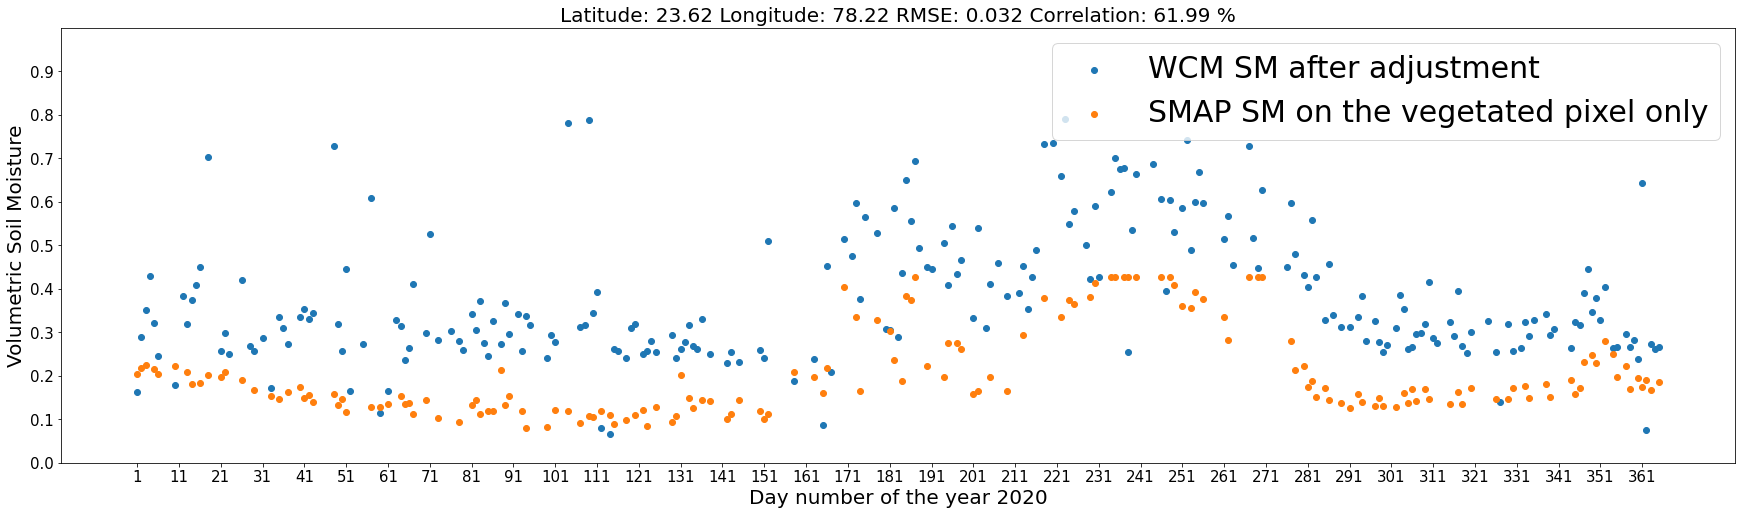

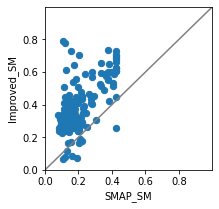

<Figure size 144x144 with 0 Axes>

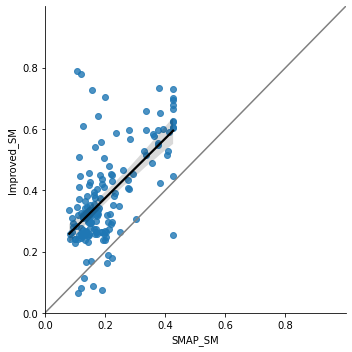

In [74]:
Plotting_Var(Df,lat,lon)

### Correlation of WCM with GLDAS soil moisture

In [75]:
def New_SM1(DF_batch,X_SM,idx):
    Mv0 = X_SM
    SM_initialized = []
    for i in range(len(DF_batch)):
        D  = int(np.array(idx)[i])
        SM = float(Mv0[D])
        SM_initialized.append(SM)
    SM_initialized = np.array(SM_initialized).reshape(len(SM_initialized),) 
    DF_batch['WCM_SM'] = SM_initialized
    return DF_batch

X_SM     = X[u1+2:].values
GLDAS_WCM_SM = New_SM1(DF_batch,X_SM,idx)

In [76]:
GLDAS_WCM_SM1 = GLDAS_WCM_SM.drop(['SR_eff','SP_I','sp_lat','sp_lon','LAI'], axis=1)
GLDAS_WCM_SM1 = GLDAS_WCM_SM1.drop_duplicates()
GLDAS_WCM_SM1['Sv'] = GLDAS_WCM_SM1['Sv']/20
GLDAS_WCM_SM1 = GLDAS_WCM_SM1[(GLDAS_WCM_SM1['WCM_SM']<0.8)]
GLDAS_WCM_SM1 = GLDAS_WCM_SM1[(GLDAS_WCM_SM1['WCM_SM']>0)]
GLDAS_WCM_SM1.corr()

,Day_No,GLDAS_SM,Sv,WCM_SM
Day_No,1.000000,0.344890,0.045282,0.132926
GLDAS_SM,0.344890,1.000000,0.411082,0.470217
Sv,0.045282,0.411082,1.000000,0.759628
WCM_SM,0.132926,0.470217,0.759628,1.000000


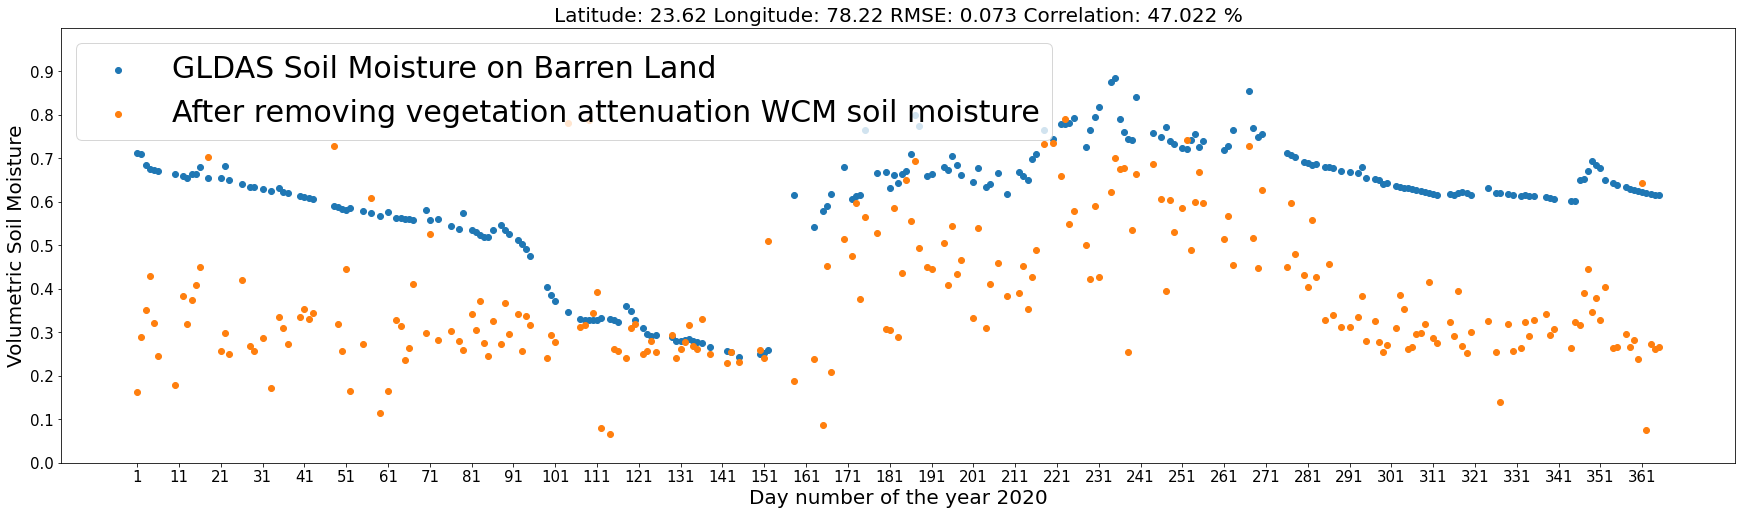

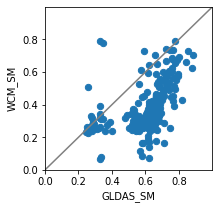

<Figure size 144x144 with 0 Axes>

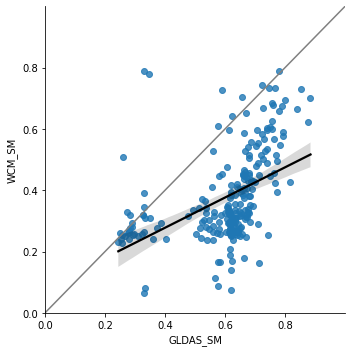

In [77]:
CR   = np.array(GLDAS_WCM_SM1.corr())
CR   = round((CR[1][3])*100,3)
RMSE = round(np.sum((GLDAS_WCM_SM1['GLDAS_SM'] - GLDAS_WCM_SM1['WCM_SM'])**2)/len(GLDAS_WCM_SM1['GLDAS_SM']),3)

Plotting_Variations(GLDAS_WCM_SM1
                    ,'GLDAS_SM'
                    ,'WCM_SM'
                    ,'GLDAS Soil Moisture on Barren Land'
                    ,'After removing vegetation attenuation WCM soil moisture')

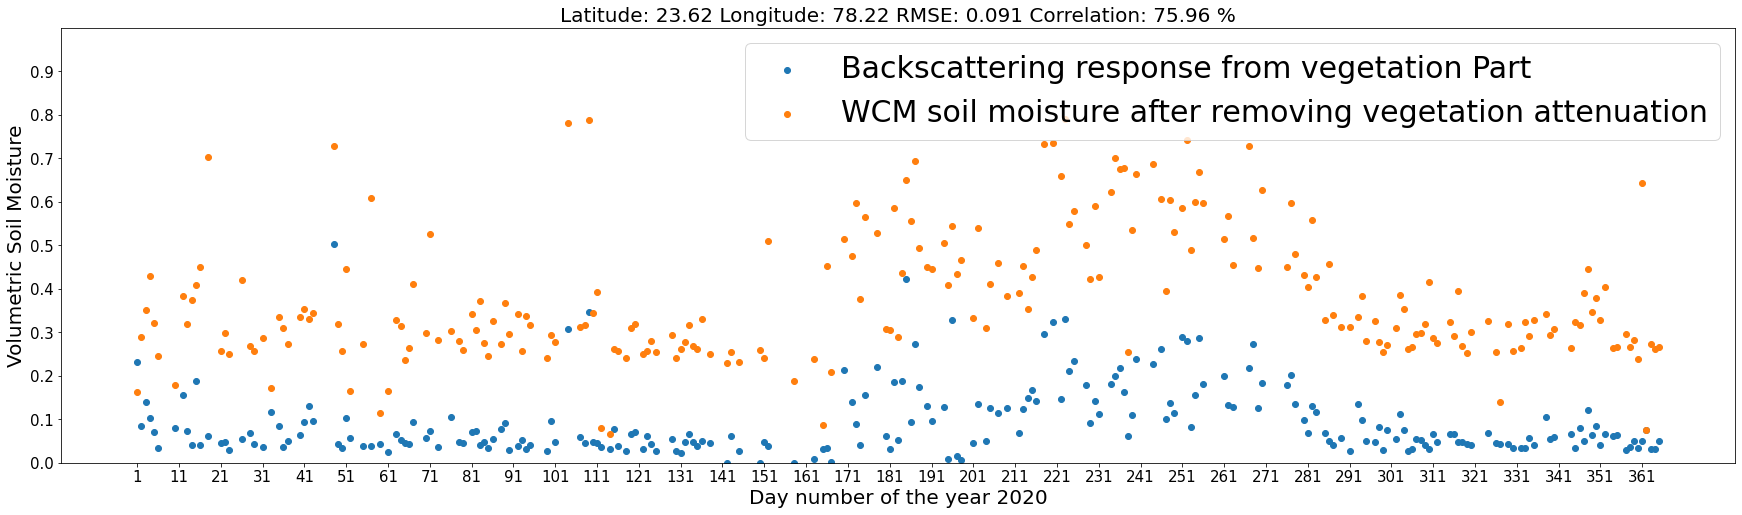

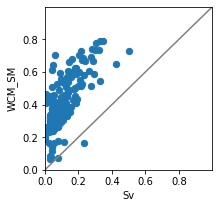

<Figure size 144x144 with 0 Axes>

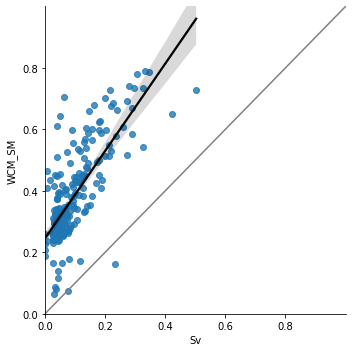

In [78]:
CR   = np.array(GLDAS_WCM_SM1.corr())
CR   = round((CR[2][3])*100,2)
RMSE = round(np.sum((GLDAS_WCM_SM1['Sv'] - GLDAS_WCM_SM1['WCM_SM'])**2)/len(GLDAS_WCM_SM1['Sv']),3)

Plotting_Variations(GLDAS_WCM_SM1
                    ,'Sv'
                    ,'WCM_SM'
                    ,'Backscattering response from vegetation Part'
                    ,'WCM soil moisture after removing vegetation attenuation')

### Correlation of SMAP with GLDAS soil moisture

In [79]:
GLDAS_SM1['Day_No'] = pd.DataFrame(np.array(SMAP_SM['Day_No']))
GLDAS_SM1['SMAP_SM'] = SMAP_SM['SMAP_SM']
GLDAS_SM1 = GLDAS_SM1[GLDAS_SM1['GLDAS_SM']<0.8]
GLDAS_SM1

,GLDAS_SM,Day_No,SMAP_SM
0,0.712536,1,0.204853
1,0.710286,2,0.218594
2,0.684648,3,0.225065
3,0.676413,4,NaN
4,0.673941,5,0.216281
...,...,...,...
360,0.623587,361,0.175247
361,0.619572,362,0.190739
362,0.617998,363,0.168120
363,0.616732,364,NaN


In [80]:
GLDAS_SM1.corr()

,GLDAS_SM,Day_No,SMAP_SM
GLDAS_SM,1.000000,0.333255,0.657737
Day_No,0.333255,1.000000,0.280373
SMAP_SM,0.657737,0.280373,1.000000


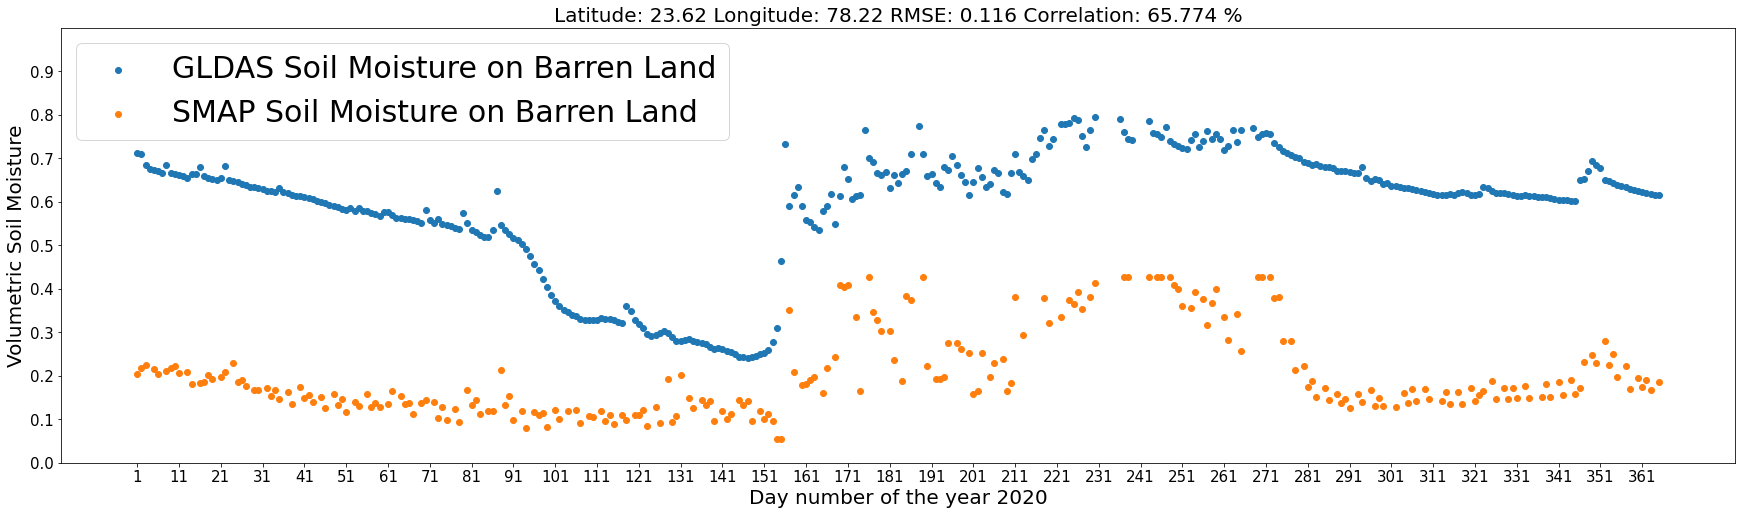

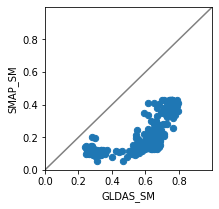

<Figure size 144x144 with 0 Axes>

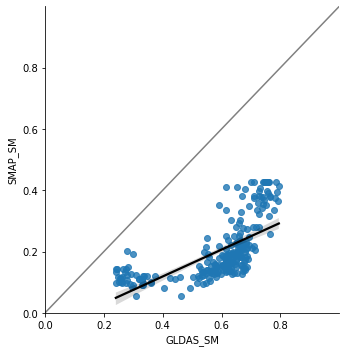

In [81]:
CR = np.array(GLDAS_SM1.corr())
CR = round((CR[0][2])*100,3)
RMSE = round(np.sum((GLDAS_SM1['GLDAS_SM'] - GLDAS_SM1['SMAP_SM'])**2)/len(GLDAS_SM1['GLDAS_SM']),3)

Plotting_Variations(GLDAS_SM1
                    ,'GLDAS_SM'
                    ,'SMAP_SM'
                    ,'GLDAS Soil Moisture on Barren Land'
                    ,'SMAP Soil Moisture on Barren Land')